We preprocess data for training

In [1]:
import pandas as pd
import os.path as op
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

In [2]:
# DATA_DIR = '/home/totucuong/projects/thirdparty/bvi-truth-discovery/data'
DATA_DIR = '../data'

# Preprocess Population Dataset

In [3]:
population_claims = pd.read_csv(op.join(DATA_DIR, 'population/population_claims.csv'))
claims = population_claims.copy()
population_truths = pd.read_csv(op.join(DATA_DIR, 'population/population_truth.csv'))
truths = population_truths.copy()

Not all the claims has their corresponding truths. We need to filter them out

In [4]:
claims['object'] = claims.ObjectID.apply(lambda x: x.replace(',', '_').replace(' ', '')) + '_' + claims.PropertyID
claims['value'] = claims.PropertyValue
claims.drop(columns=['ObjectID', 'PropertyID', 'PropertyValue', 'TimeStamp'], inplace=True)

In [5]:
truths['object'] = truths.ObjectID.apply(lambda x: x.replace(',', '_').replace(' ', '')) + '_' + truths.PropertyID
truths['value'] = truths.PropertyValue
truths.drop(columns=['ObjectID', 'PropertyID', 'PropertyValue'], inplace=True)

### drop duplicates

In [6]:
claims.drop_duplicates().shape, claims.shape

((49953, 3), (49955, 3))

In [7]:
truths.drop_duplicates().shape, truths.shape

((308, 2), (308, 2))

In [8]:
claims.drop_duplicates(inplace=True)
claims.shape

(49953, 3)

### We discover that not all truth has corresponding claims

In [9]:
truths[truths.object=='st.joseph_missouri_Population2000'].shape[0], claims[claims.object == 'st.joseph_missouri_Population2000'].shape[0]

(1, 0)

In [10]:
object_with_claims_and_truth = list(set(claims.object).intersection(set(truths.object)))

In [11]:
truths = truths.set_index('object').loc[object_with_claims_and_truth].reset_index()

In [12]:
claims = claims.set_index('object').loc[object_with_claims_and_truth].reset_index()

In [13]:
truths.shape, claims.shape

((301, 2), (1046, 3))

### Data Encoding

In [14]:
object_le = LabelEncoder()
claims['object_id'] = object_le.fit_transform(claims.object)

In [15]:
truths['object_id'] = object_le.transform(truths.object)

Now we encode source id

In [16]:
source_le = LabelEncoder()

In [17]:
claims['source_id'] = source_le.fit_transform(claims.SourceID)

we also encode object id

In [18]:
import pickle

In [19]:
with open(op.join(DATA_DIR, 'population/object_le.pkl'), 'wb') as f:
    pickle.dump(object_le, f)
with open(op.join(DATA_DIR, 'population/source_le.pkl'), 'wb') as f:
    pickle.dump(source_le, f)

So we need to keep only objects that have both claims and truth.

### Saving data

In [20]:
truths.to_csv(op.join(DATA_DIR, 'population/truths.csv'), index=False)

In [21]:
claims.to_csv(op.join(DATA_DIR, 'population/claims.csv'), index=False)

In [22]:
truths.shape, claims.shape

((301, 3), (1046, 5))

# Distribution of number of claims per object

In [23]:
claims.shape, truths.shape

((1046, 5), (301, 3))

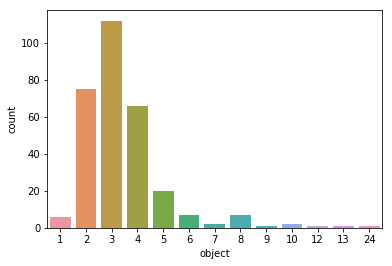

In [24]:
sns.countplot(claims.object.value_counts())

In [25]:
claims[claims.object=='lima_ohio_Population2000']

,object,SourceID,value,object_id,source_id
893,lima_ohio_Population2000,3922229: Hmwith,40081,135,507
894,lima_ohio_Population2000,0 (59.100.77.217),40081000,135,116
895,lima_ohio_Population2000,5512121: CapitalBot,40081,135,561


In [26]:
truths[truths.object == 'lima_ohio_Population2000']

,object,value,object_id
262,lima_ohio_Population2000,40081,135


In [27]:
claims[claims.object == 'lima_ohio_Population2000']

,object,SourceID,value,object_id,source_id
893,lima_ohio_Population2000,3922229: Hmwith,40081,135,507
894,lima_ohio_Population2000,0 (59.100.77.217),40081000,135,116
895,lima_ohio_Population2000,5512121: CapitalBot,40081,135,561


In [28]:
source_le.inverse_transform(claims.source_id[:10])

array(['16168: SatyrTN', '0 (76.19.53.22)', '5512121: CapitalBot',
       '201610: Pentawing', '89326: Swid', '0 (209.244.7.243)',
       '0 (130.13.0.68)', '3315180: Someguy1221', '0 (141.246.2.6)',
       '16824: Freechild'], dtype=object)

In [29]:
truths.shape, claims.shape

((301, 3), (1046, 5))